In [1]:
from sklearn.datasets import load_iris

iris_data = load_iris()

In [2]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
features = iris_data.data
labels = iris_data.target

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

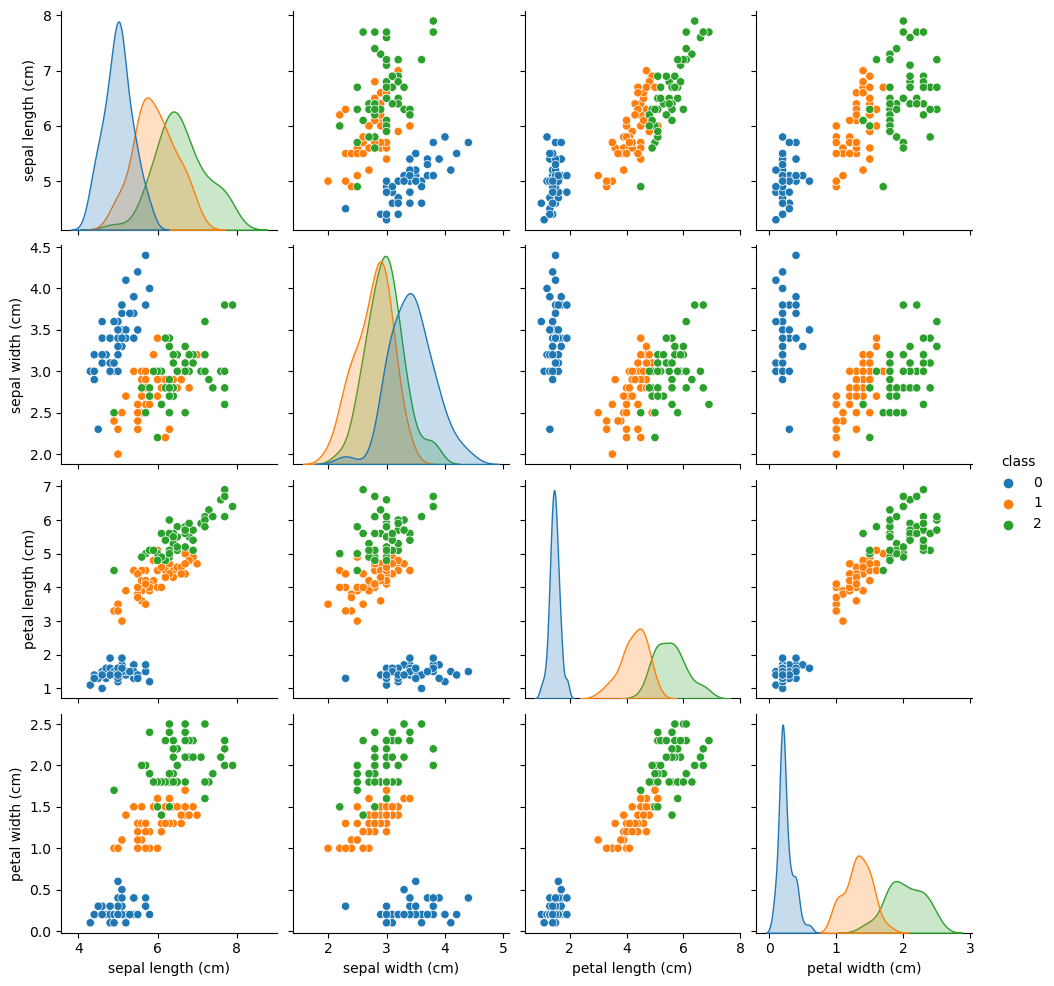

In [4]:
# Normalizing data to [0, 1]
from sklearn.preprocessing import MinMaxScaler 
import pandas as pd
import seaborn as sns

features = MinMaxScaler().fit_transform(features)
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df["class"] = pd.Series(iris_data.target)

sns.pairplot(df, hue="class", palette="tab10")

## Classical Support Vector Classifier (SVC)

In [5]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, train_size=0.8, random_state=algorithm_globals.random_seed)

In [6]:
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(train_features, train_labels)

In [7]:
train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset: {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.99
Classical SVC on the test dataset: 0.97


## Variational Quantum Classifier 

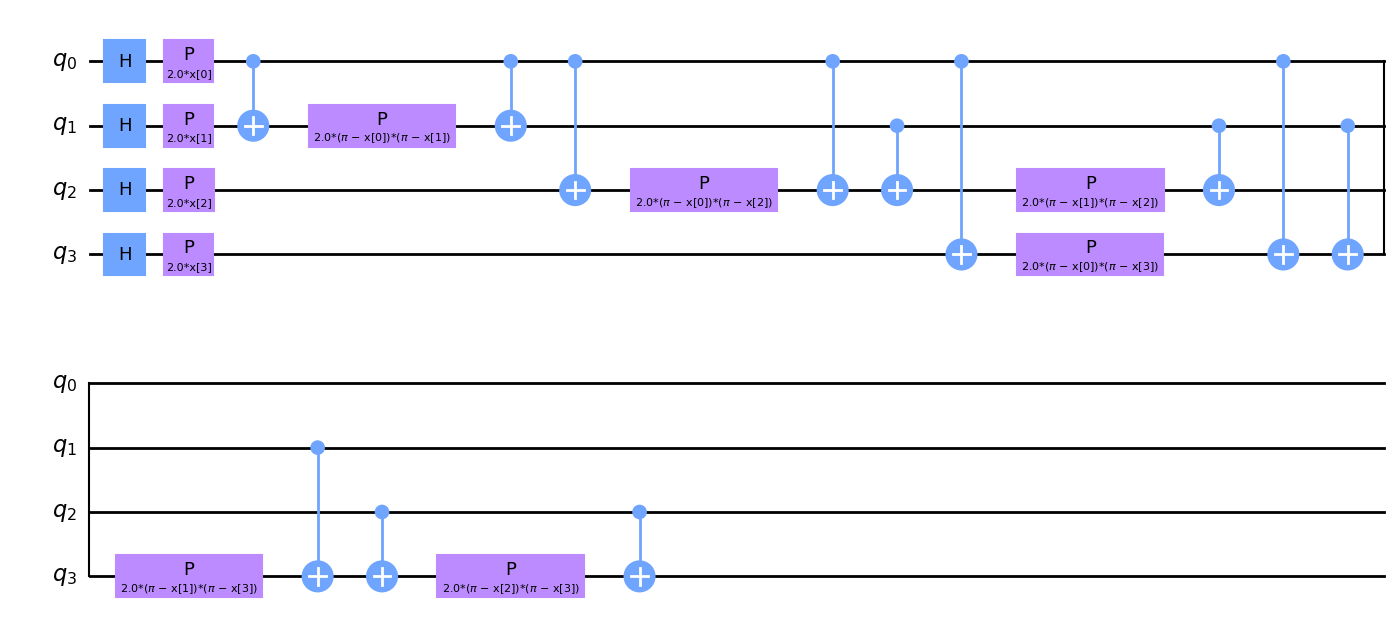

In [8]:
# Feature mapping data onto a parametrized quantum circuit 

from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

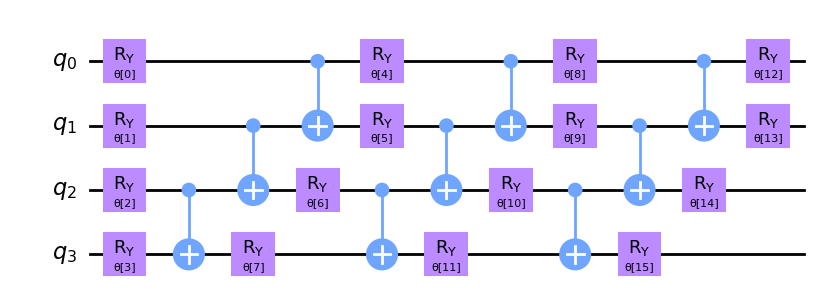

In [9]:
from qiskit.circuit.library import RealAmplitudes 

# Instantiating trainable weights
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

In [11]:
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler

optimizer = COBYLA(maxiter=100)
sampler = Sampler()

# Callback function to be called for each data point
from matplotlib import pyplot as plt 
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

def callback_graph(weights, obj_func_eval): 
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration graph")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

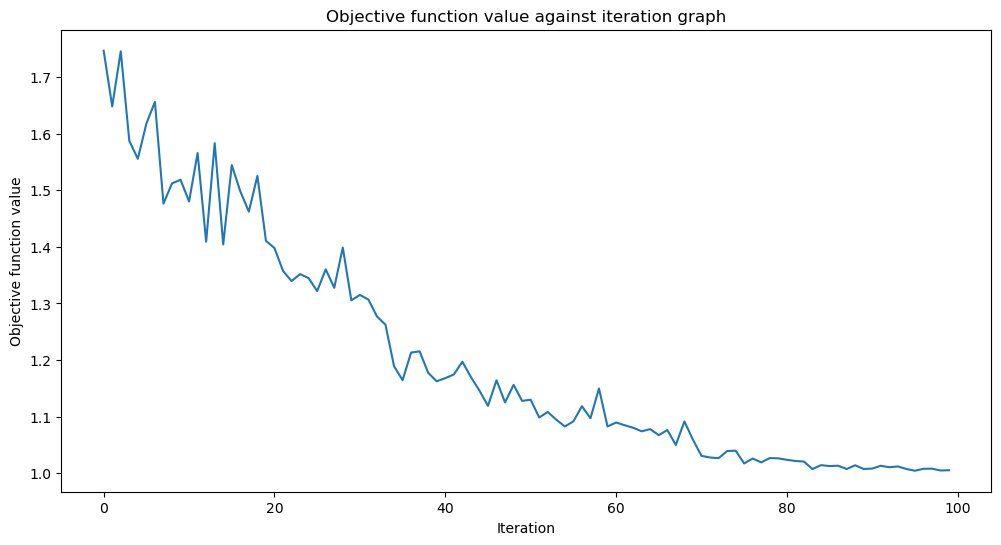

Training time: 21 seconds.


In [12]:
import time 
from qiskit_machine_learning.algorithms.classifiers import VQC

# Constructing a QNN using VQC with the feature map and ansatz as parameters 

vqc = VQC(sampler=sampler, feature_map=feature_map, ansatz=ansatz, optimizer=optimizer, callback=callback_graph,)

objective_func_vals = [] # instantiation
start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds.")

In [13]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"VQC on the training dataset: {train_score_q4:.2f}")
print(f"VQC on the test dataset: {test_score_q4:.2f}")

VQC on the training dataset: 0.85
VQC on the test dataset: 0.87


## Principle Component Analysis (PCA)

<Axes: >

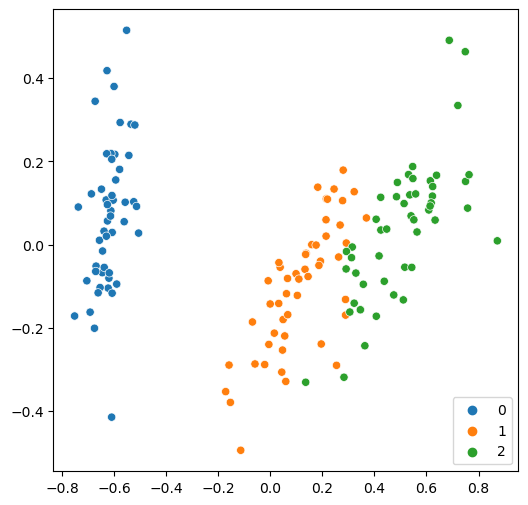

In [14]:
from sklearn.decomposition import PCA

features = PCA(n_components=2).fit_transform(features)

plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=features[:, 0], y=features[:,1], hue=labels, palette="tab10")

In [15]:
# using SVC

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, train_size=0.8, random_state=algorithm_globals.random_seed)

svc.fit(train_features, train_labels)

train_score_c2 = svc.score(train_features, train_labels)
test_score_c2 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c2:.2f}")
print(f"Classical SVC on the test dataset: {test_score_c2:.2f}")

Classical SVC on the training dataset: 0.97
Classical SVC on the test dataset: 0.90


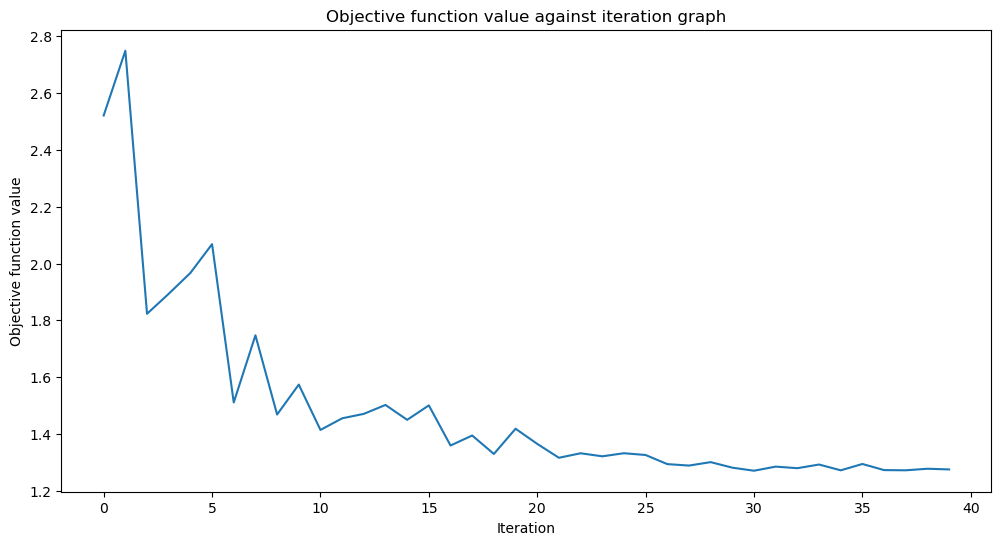

Training time: 5 seconds.


In [16]:
# using VQC

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

optimizer = COBYLA(maxiter=40)

# Constructing a QNN using VQC with the feature map and ansatz as parameters 

vqc = VQC(sampler=sampler, feature_map=feature_map, ansatz=ansatz, optimizer=optimizer, callback=callback_graph,)

objective_func_vals = [] # instantiation
plt.rcParams["figure.figsize"] = [12, 6]

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds.")

In [17]:
train_score_q2 = vqc.score(train_features, train_labels)
test_score_q2 = vqc.score(test_features, test_labels)

print(f"VQC on the training dataset: {train_score_q2:.2f}")
print(f"VQC on the test dataset: {test_score_q2:.2f}")

VQC on the training dataset: 0.58
VQC on the test dataset: 0.63


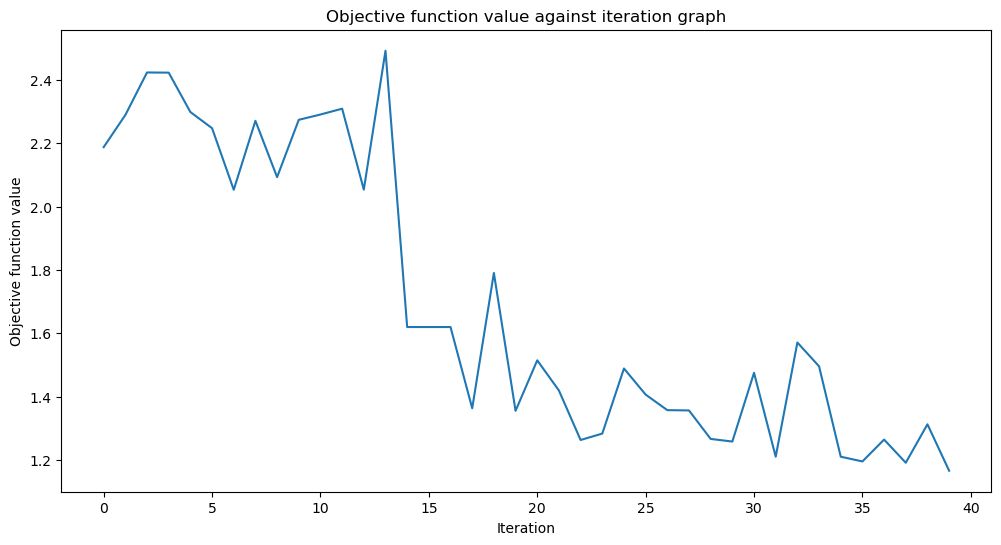

Training time: 6 seconds.


In [18]:
# The objective function converges upon certain number of iterations, without necessarily reaching a better solution.

from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=40)

# Constructing a QNN using VQC with the feature map and ansatz as parameters 

vqc = VQC(sampler=sampler, feature_map=feature_map, ansatz=ansatz, optimizer=optimizer, callback=callback_graph,)

objective_func_vals = [] # instantiation

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds.")

In [19]:
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

print(f"VQC on the training dataset: {train_score_q2_eff:.2f}")
print(f"VQC on the test dataset: {test_score_q2_eff:.2f}")

VQC on the training dataset: 0.71
VQC on the test dataset: 0.67


## Post-processing / comparison

In [20]:
print(f"Model                           | Test Score | Train Score")
print(f"SVC, 4 features                 | {train_score_c4:10.2f} | {test_score_c4:10.2f}")
print(f"VQC, 4 features, RealAmplitudes | {train_score_q4:10.2f} | {test_score_q4:10.2f}")
print(f"----------------------------------------------------------")
print(f"SVC, 2 features                 | {train_score_c2:10.2f} | {test_score_c2:10.2f}")
print(f"VQC, 2 features, RealAmplitudes | {train_score_q2:10.2f} | {test_score_q2:10.2f}")
print(f"VQC, 2 features, EfficientSU2   | {train_score_q2_eff:10.2f} | {test_score_q2_eff:10.2f}")

Model                           | Test Score | Train Score
SVC, 4 features                 |       0.99 |       0.97
VQC, 4 features, RealAmplitudes |       0.85 |       0.87
----------------------------------------------------------
SVC, 2 features                 |       0.97 |       0.90
VQC, 2 features, RealAmplitudes |       0.58 |       0.63
VQC, 2 features, EfficientSU2   |       0.71 |       0.67
